Sentence Transformers are powerful encoders

##Assesment

#Assignment 1: Submit a write-up on the following:

- Hugging face agents

- Hugging face pipeline for text generation

- HF inference endpoints

- Give feedback on the image generation and explore different models available on the Hugging Face website



#Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

#Objective

##In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.


##Part 1: Generate Captions for Images

##Part 2: Build an Image Search Engine


##Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models

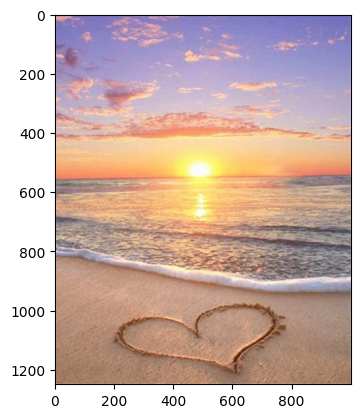

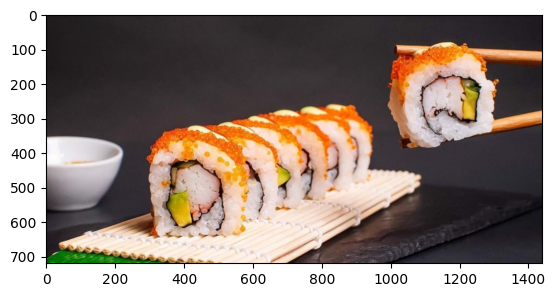

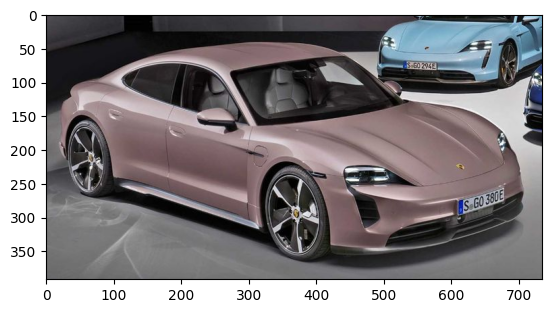

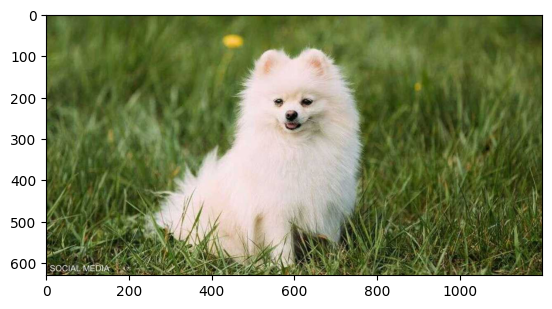

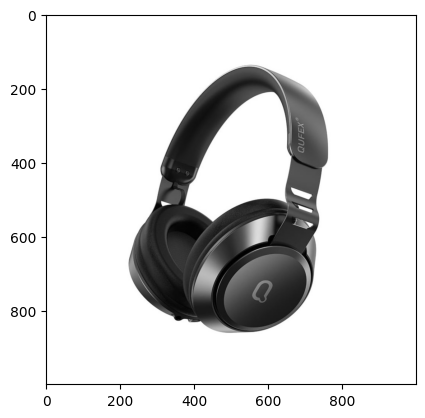

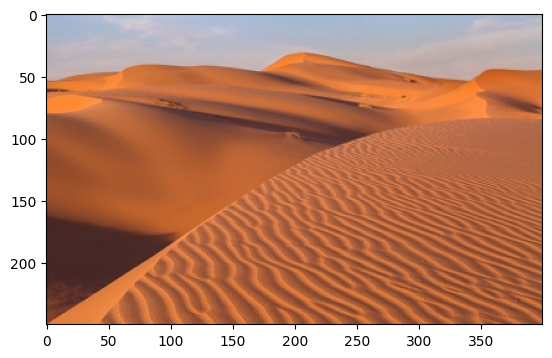

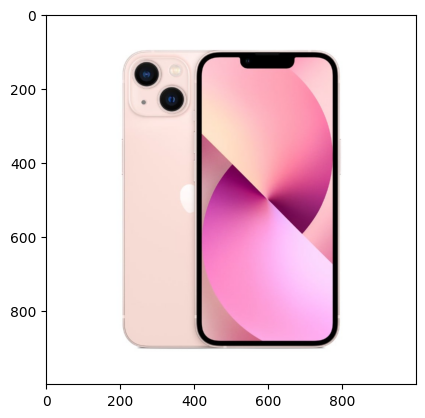

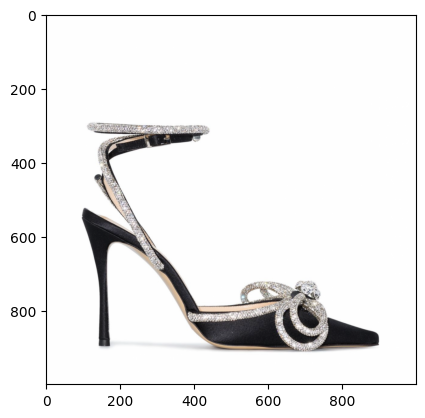

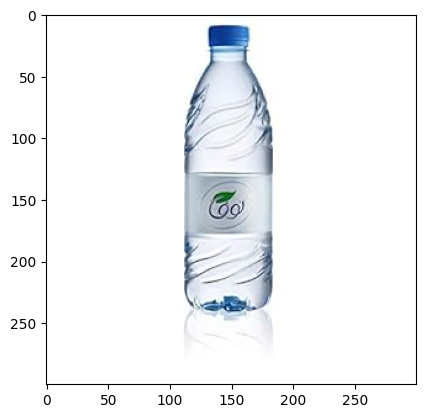

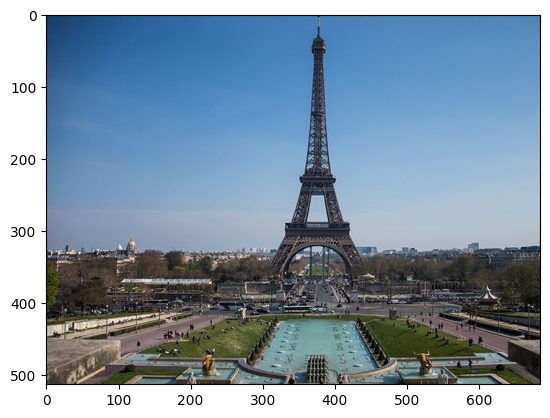

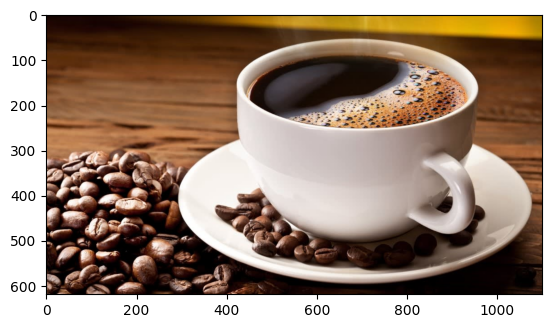

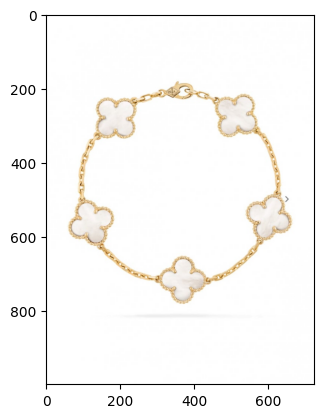

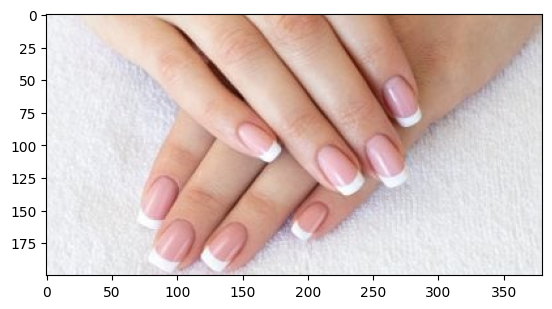

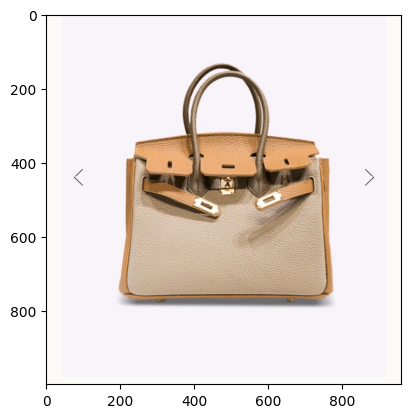

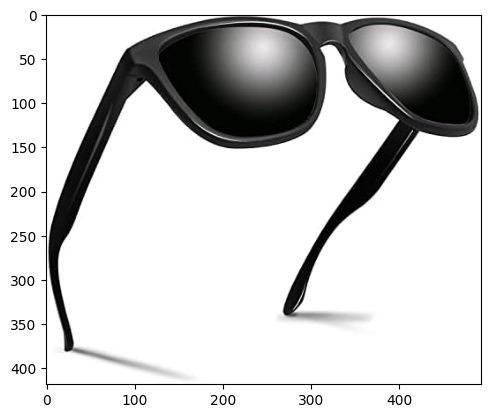

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests


urls = [
    "https://m.media-amazon.com/images/I/61RxOhzTCJL.jpg",#بحر
    "https://hungerstation.com/_next/image?url=https%3A%2F%2Fimages.deliveryhero.io%2Fimage%2Fhungerstation%2Frestaurant%2Fandroid_cover_photo%2F46c7a9099e28ae0af8d87ab922bf885e.jpeg&w=1440&q=75",#سوشي
    "https://i.pinimg.com/736x/9b/a7/ea/9ba7ea3fb570a157973f7073881da572.jpg",
     "https://www.skynewsarabia.com/images/v1/2020/03/19/1329445/1200/630/1-1329445.jpg"
    ,"https://cdn.salla.sa/bKAWX/eGTstXf8ITq6AjcbwZxuyXzOfP2sDVlidc8fPBIP.jpg"#سماعه

  ,"https://saudipedia.com/saudipedia/uploads/images/2023/08/24/thumbs/400x400/65047.jpg"#صحرا
    ,"https://cdn.salla.sa/bRpKW/n5pmYi2ZGDM0ASAZIt4l4DpaxBZrMV6Cfe1emARq.jpg"#جوال
    ,"https://media.zid.store/8cf414bf-7ffb-4b2b-a45a-b1fe01669e8b/42ec437b-1ce7-4607-9f92-b672d385a4f4.png"#كعب

  ,"https://m.media-amazon.com/images/S/aplus-media/sota/d3199d53-fcc1-4819-b515-b525476d5e1d.__CR0,0,470,470_PT0_SX300_V1___.jpg"#مويه
    ,"https://www.aljazeera.net/wp-content/uploads/2014/11/60f2d33d-3cbd-4492-a05b-16f3523a7e60.jpeg?resize=686%2C513&quality=80"# باريس
    ,"https://cnn-arabic-images.cnn.io/cloudinary/image/upload/w_1100,h_619,c_fill,q_auto,g_center/cnnarabic/2020/10/02/images/166469.jpg"#قهوه
    ,"https://cdn.salla.sa/GOwxb/e4rtDi4nBzBZQnxczcDWKO15lD9qv0a925CzMLol.jpg"# سواره فان كليف
    ,"https://img.youm7.com/large/20230426012107217.jpg"#اظافر
   , "https://cdn.salla.sa/qqZXN/2FU4WzCpxTxZeRfcvmUkpOTKgikFRsy13QOKitq2.jpg",
    "https://m.media-amazon.com/images/I/31gqmOaHukL._AC_.jpg"

]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]


for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [ ]:
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')# يسوي امبدينق الصوره
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

In [ ]:
import requests # image captioning

API_URL = "https://api-inference.huggingface.co/models/Salesforce/blip-image-captioning-base"
headers = {"Authorization": "https://api-inference.huggingface.co/models/Salesforce/blip-image-captioning-base"}

def query(filenames):
    outputs = []
    for filename in filenames:
        with open(filename, "rb") as f:
            data = f.read()
        response = requests.post(API_URL, headers=headers, data=data)
        outputs.append(response.json())
    return outputs


image_files= ["/content/61RxOhzTCJL.jpg","/content/9.jpg","/content/5.jpg","/content/21.jpg","/content/2.jpg","/content/11.jpg"]
output = query(image_files)

In [ ]:
captions = input("enter:")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:


images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=0)
probs

tensor([8])

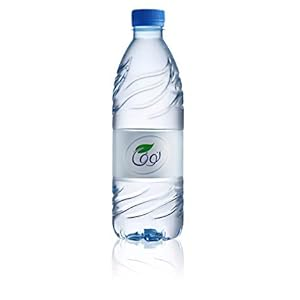

In [ ]:
images[probs.item()]